In [36]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [37]:
df = pd.read_csv('train.csv')

In [38]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
data = np.array(df)

In [40]:
data.shape
np.random.shuffle(data)
m,n = data.shape
data_dev = data[0:1000].T
data_train = data[1000:m].T
y_dev = data_dev[0]
X_dev = data_dev[1:n]
y_train = data_train[0]
X_train = data_train[1:n]
X_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [41]:
def init_parameters():
    W1 = np.random.randn(100,784) - 0.5
    b1 = np.random.randn(100,1) - 0.5
    W2 = np.random.randn(10,100) - 0.5
    b2 = np.random.randn(10,1) - 0.5
    return W1, b1, W2, b2

def RELU(X):
    return np.maximum(0,X)
def Softmax(X):
    expo = np.exp(X)
    expo_sum = np.sum(np.exp(X))
    return expo/expo_sum

def forward_prop(X,W1,b1,W2,b2):
    Z1 = W1.dot(X) + b1
    A1 = RELU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = Softmax(Z2)
    return Z1, A1, Z2, A2

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max()+1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def back_prop(Z1, A1, Z2, A2, W2,X, Y):
    m = Y.size
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1/m * dZ2.dot(A1.T)
    db2 = 1/m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * (Z1 > 0)
    dW1 = 1/m * dZ1.dot(X.T)
    db1 = 1/m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def regularization(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    return W1, b1, W2, b2

def get_predictions(A2):
    return np.argmax(A2, 0)

def predict(X, W1, b1, W2, b2):
    Z1, A1, Z2, A2 = forward_prop(X, W1, b1, W2, b2)
    predictions = get_predictions(A2)
    return predictions

def accuracy(predictions, Y):
    return np.mean(predictions == Y)


def gradient_Descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_parameters()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(X, W1, b1, W2, b2)
        dW1, db1, dW2, db2 = back_prop(Z1, A1, Z2, A2, W2, X, Y)
        W1, b1, W2, b2 = regularization(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            print("Accuracy: ", accuracy(get_predictions(A2), Y))
    return W1, b1, W2, b2

In [42]:
w1, b1, w2, b2 = gradient_Descent(X_train, y_train, 0.10, 100)

Iteration:  0
Accuracy:  0.09831707317073171
Iteration:  10
Accuracy:  0.09831707317073171
Iteration:  20
Accuracy:  0.09831707317073171
Iteration:  30
Accuracy:  0.09831707317073171
Iteration:  40
Accuracy:  0.09831707317073171


C:\Users\karan\AppData\Local\Temp\ipykernel_23368\2052152293.py:11: RuntimeWarning: overflow encountered in exp
  expo = np.exp(X)
C:\Users\karan\AppData\Local\Temp\ipykernel_23368\2052152293.py:12: RuntimeWarning: overflow encountered in exp
  expo_sum = np.sum(np.exp(X))
C:\Users\karan\AppData\Local\Temp\ipykernel_23368\2052152293.py:13: RuntimeWarning: invalid value encountered in divide
  return expo/expo_sum


Iteration:  50
Accuracy:  0.09831707317073171
Iteration:  60
Accuracy:  0.09831707317073171
Iteration:  70
Accuracy:  0.09831707317073171
Iteration:  80
Accuracy:  0.09831707317073171
Iteration:  90
Accuracy:  0.09831707317073171


In [43]:
def momentum(X, Y, alpha, iterations, gamma):
    W1, b1, W2, b2 = init_parameters()
    VdW1 = np.zeros(W1.shape)
    Vdb1 = np.zeros(b1.shape)
    VdW2 = np.zeros(W2.shape)
    Vdb2 = np.zeros(b2.shape)
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(X, W1, b1, W2, b2)
        dW1, db1, dW2, db2 = back_prop(Z1, A1, Z2, A2, W2, X, Y)
        VdW1 = gamma * VdW1 + alpha * dW1
        Vdb1 = gamma * Vdb1 + alpha * db1
        VdW2 = gamma * VdW2 + alpha * dW2
        Vdb2 = gamma * Vdb2 + alpha * db2
        W1 = W1 - VdW1
        b1 = b1 - Vdb1
        W2 = W2 - VdW2
        b2 = b2 - Vdb2
        if i % 10 == 0:
            print("Iteration: ", i)
            print("Accuracy: ", accuracy(get_predictions(A2), Y))
    return W1, b1, W2, b2

def RMSProp(X, Y, alpha, iterations, epsilon, beta):
    W1, b1, W2, b2 = init_parameters()
    SdW1 = np.zeros(W1.shape)
    Sdb1 = np.zeros(b1.shape)
    SdW2 = np.zeros(W2.shape)
    Sdb2 = np.zeros(b2.shape)
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(X, W1, b1, W2, b2)
        dW1, db1, dW2, db2 = back_prop(Z1, A1, Z2, A2, W2, X, Y)
        SdW1 = beta * SdW1 + (1 - beta) * dW1**2
        Sdb1 = beta * Sdb1 + (1 - beta) * db1**2
        SdW2 = beta * SdW2 + (1 - beta) * dW2**2
        Sdb2 = beta * Sdb2 + (1 - beta) * db2**2
        W1 = W1 - alpha / np.sqrt(SdW1 + epsilon) * dW1
        b1 = b1 - alpha / np.sqrt(Sdb1 + epsilon) * db1
        W2 = W2 - alpha / np.sqrt(SdW2 + epsilon) * dW2
        b2 = b2 - alpha / np.sqrt(Sdb2 + epsilon) * db2
        if i % 10 == 0:
            print("Iteration: ", i)
            print("Accuracy: ", accuracy(get_predictions(A2), Y))
    return W1, b1, W2, b2

def Adam(X, Y, alpha, iterations, epsilon, beta1, beta2):
    W1, b1, W2, b2 = init_parameters()
    VdW1 = np.zeros(W1.shape)
    Vdb1 = np.zeros(b1.shape)
    VdW2 = np.zeros(W2.shape)
    Vdb2 = np.zeros(b2.shape)
    SdW1 = np.zeros(W1.shape)
    Sdb1 = np.zeros(b1.shape)
    SdW2 = np.zeros(W2.shape)
    Sdb2 = np.zeros(b2.shape)
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(X, W1, b1, W2, b2)
        dW1, db1, dW2, db2 = back_prop(Z1, A1, Z2, A2, W2, X, Y)
        VdW1 = beta1 * VdW1 + (1 - beta1) * dW1
        Vdb1 = beta1 * Vdb1 + (1 - beta1) * db1
        VdW2 = beta1 * VdW2 + (1 - beta1) * dW2
        Vdb2 = beta1 * Vdb2 + (1 - beta1) * db2
        SdW1 = beta2 * SdW1 + (1 - beta2) * dW1**2
        Sdb1 = beta2 * Sdb1 + (1 - beta2) * db1**2
        SdW2 = beta2 * SdW2 + (1 - beta2) * dW2**2
        Sdb2 = beta2 * Sdb2 + (1 - beta2) * db2**2
        VdW1_corrected = VdW1 / (1 - beta1**(i + 1))
        Vdb1_corrected = Vdb1 / (1 - beta1**(i + 1))
        VdW2_corrected = VdW2 / (1 - beta1**(i + 1))
        Vdb2_corrected = Vdb2 / (1 - beta1**(i + 1))
        SdW1_corrected = SdW1 / (1 - beta2**(i + 1))
        Sdb1_corrected = Sdb1 / (1 - beta2**(i + 1))
        SdW2_corrected = SdW2 / (1 - beta2**(i + 1))
        Sdb2_corrected = Sdb2 / (1 - beta2**(i + 1))
        W1 = W1 - alpha * VdW1_corrected / np.sqrt(SdW1_corrected + epsilon)
        b1 = b1 - alpha * Vdb1_corrected / np.sqrt(Sdb1_corrected + epsilon)
        W2 = W2 - alpha * VdW2_corrected / np.sqrt(SdW2_corrected + epsilon)
        b2 = b2 - alpha * Vdb2_corrected / np.sqrt(Sdb2_corrected + epsilon)
        if i % 10 == 0:
            print("Iteration: ", i)
            print("Accuracy: ", accuracy(get_predictions(A2), Y))
    return W1, b1, W2, b2




C:\Users\karan\AppData\Local\Temp\ipykernel_23368\2052152293.py:11: RuntimeWarning: overflow encountered in exp
  expo = np.exp(X)
C:\Users\karan\AppData\Local\Temp\ipykernel_23368\2052152293.py:12: RuntimeWarning: overflow encountered in exp
  expo_sum = np.sum(np.exp(X))
C:\Users\karan\AppData\Local\Temp\ipykernel_23368\2052152293.py:13: RuntimeWarning: invalid value encountered in divide
  return expo/expo_sum


Iteration:  0
Accuracy:  0.09831707317073171
Iteration:  10
Accuracy:  0.09831707317073171
Iteration:  20
Accuracy:  0.09831707317073171
Iteration:  30
Accuracy:  0.09831707317073171
Iteration:  40
Accuracy:  0.09831707317073171
Iteration:  50
Accuracy:  0.09831707317073171
Iteration:  60
Accuracy:  0.09831707317073171
Iteration:  70
Accuracy:  0.09831707317073171
Iteration:  80
Accuracy:  0.09831707317073171
Iteration:  90
Accuracy:  0.09831707317073171
Iteration:  0
Accuracy:  0.09836585365853659
Iteration:  10
Accuracy:  0.09831707317073171
Iteration:  20
Accuracy:  0.09831707317073171
Iteration:  30
Accuracy:  0.09831707317073171
Iteration:  40
Accuracy:  0.09831707317073171
Iteration:  50
Accuracy:  0.09831707317073171
Iteration:  60
Accuracy:  0.09831707317073171
Iteration:  70
Accuracy:  0.09831707317073171
Iteration:  80
Accuracy:  0.09831707317073171
Iteration:  90
Accuracy:  0.09831707317073171
Iteration:  0
Accuracy:  0.09831707317073171
Iteration:  10
Accuracy:  0.098317073

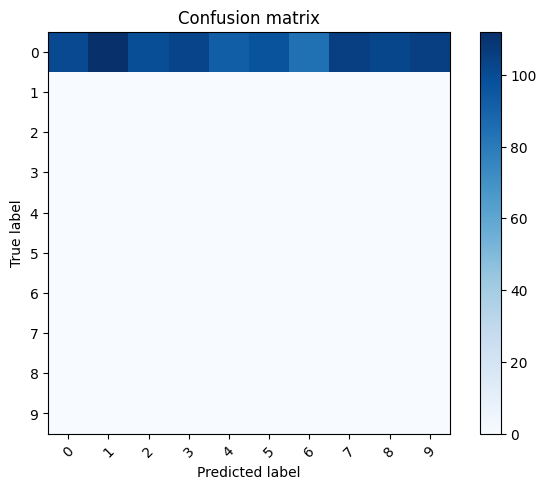

In [44]:

def mse(predictions, y_dev):
    return np.mean((predictions - y_dev) ** 2)

def ConfusionMatrix(predictions, y_dev):
    cm = np.zeros((10,10), int)
    for i in range(len(predictions)):
        cm[predictions[i], y_dev[i]] += 1
    return cm

def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(10)
    plt.xticks(tick_marks, tick_marks, rotation=45)
    plt.yticks(tick_marks, tick_marks)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

def main():
    w1, b1, w2, b2 = gradient_Descent(X_train, y_train, 0.10, 100)
    w1, b1, w2, b2 = momentum(X_train, y_train, 0.10, 100, 0.9)
    w1, b1, w2, b2 = RMSProp(X_train, y_train, 0.10, 100, 1e-7, 0.999)
    w1, b1, w2, b2 = Adam(X_train, y_train, 0.10, 100, 1e-7, 0.9, 0.999)
    predictions = predict(X_dev, w1, b1, w2, b2)
    print(accuracy(predictions, y_dev))
    cm = ConfusionMatrix(predictions, y_dev)
    plot_confusion_matrix(cm)
    print(cm)
    print(mse(predictions, y_dev))

if __name__ == "__main__":
    main()
